## Task 1.1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os 
from PIL import Image
import cv2
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import seaborn as sns


def center(images):
    newImages = images - np.mean(images, axis = 0)
    return newImages

def standardize(images):
    newImages = center(images)/np.std(images, axis = 0)
    return newImages

def printAll(category_images, category, axes): 
    for i, img in enumerate(category_images):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"{category} - Image {i+1}")
        axes[i].axis('off')
    plt.show()

def whiten(images):
    num_samples, height, width, num_channels = images.shape
    images_reshaped = np.reshape(images, (num_samples, -1))

    # Center the data
    mean_images = np.mean(images_reshaped, axis=0)
    centered_images = images_reshaped - mean_images

    # Calculate the covariance matrix
    cov_matrix = np.cov(centered_images, rowvar=False)

    # Perform PCA
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Whitening transformation matrix
    whitening_matrix = np.diag(1.0 / np.sqrt(eigenvalues + 1e-5))

    # Apply whitening transformation
    whitened_images = np.dot(np.dot(centered_images, eigenvectors), whitening_matrix).dot(eigenvectors.T)

    # Reshape the whitened images back to original shape
    whitened_images = np.reshape(whitened_images, (num_samples, height, width, num_channels))

    return whitened_images


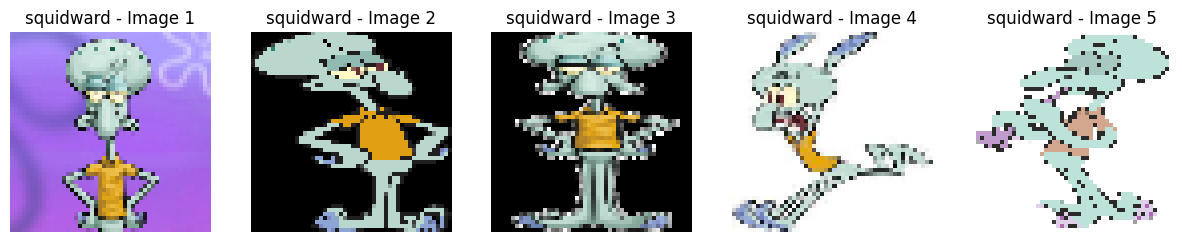

(25, 50, 50, 3)


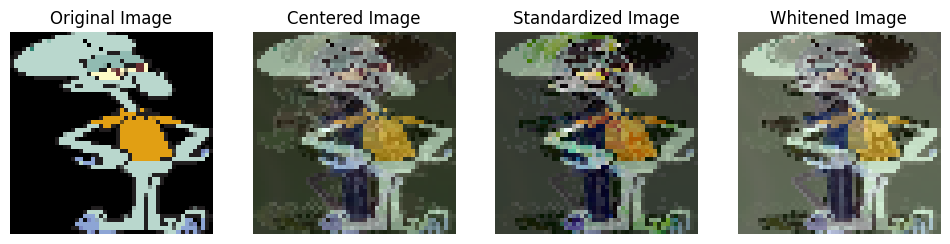

In [2]:

data_dir = "C:\\Users\\malko\\Desktop\\Skola\\D7041E-labs\\lab1\\pictures"
categories = os.listdir(data_dir)
x, y = 50, 50
all_images = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    category_images = []

    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (x, y))
        category_images.append(img)
        all_images.append(img)

    

# Create a single row of subplots for each category
num_images = len(category_images)
fig, axes = plt.subplots(1, num_images, figsize=(15, 3)) 
printAll(category_images, category, axes)
all_images_np = np.array(all_images)
print(all_images_np.shape)



category_images_np = np.array(category_images)
whitened_category_images = whiten(category_images_np)

i= 1
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(category_images[i], cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
centered_image = center(category_images_np)[i]
centered_image = ((centered_image - centered_image.min()) * (1/(centered_image.max() - centered_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(centered_image, cv2.COLOR_BGR2RGB))
plt.title("Centered Image")
plt.axis('off')

plt.subplot(1, 4, 3)
standardized_image = standardize(category_images_np)[i]
standardized_image = ((standardized_image - standardized_image.min()) * (1/(standardized_image.max() - standardized_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(standardized_image, cv2.COLOR_BGR2RGB))
plt.title("Standardized Image")
plt.axis('off')

plt.subplot(1, 4, 4)
whitened_image = whitened_category_images[i]
whitened_image = ((whitened_image - whitened_image.min()) * (1/(whitened_image.max() - whitened_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(whitened_image, cv2.COLOR_BGR2RGB))
plt.title("Whitened Image")
plt.axis('off')

plt.show()

## Task 1.2

In [3]:
from keras.datasets import mnist
import numpy as np

file_path = 'C:\\Users\\malko\\Desktop\\Skola\\D7041E-labs\\lab1\\vecs.npy'
data = np.load(file_path, allow_pickle=True).item()


def get_pos_data(data, pos):

    embeddings = []
    labels = []
    position_key = f'{pos}_pos'
    for digit, embedding_list in data[position_key].items():
            for embedding in embedding_list:
                embeddings.append(embedding)
                labels.append(digit)
    
    embeddings = np.array(embeddings)
    labels = np.array(labels)
    return(embeddings, labels)

def randomly_perm(embeddings, labels):
    assert len(embeddings) == len(embeddings), "Must be same length"

    perm = np.random.permutation(len(embeddings))
    
    perm_embeddings = embeddings[perm]
    perm_labels = labels[perm]

    return perm_embeddings, perm_labels



# change the second argument for different positions
embeddings, labels = get_pos_data(data, 1)
print(labels[:30])
embeddings, labels = randomly_perm(embeddings, labels)
print(labels[:30])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 7 2 2 7 2 3 1 6 7 8 9 7 8 8 4 4 7 4 8 8 8 3 4 1 1 5 7 2 4]


## Task 2.1

In [4]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [5]:
print(Xtr.shape)
print(Ltr.shape)
print(X_test.shape)
print(L_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


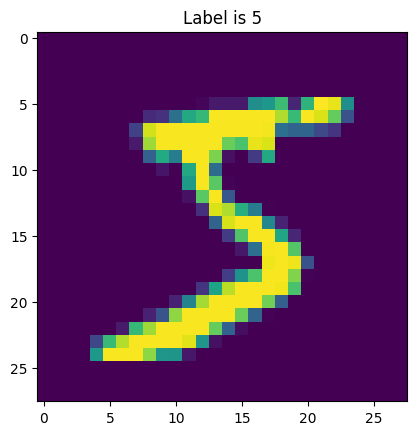

In [6]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


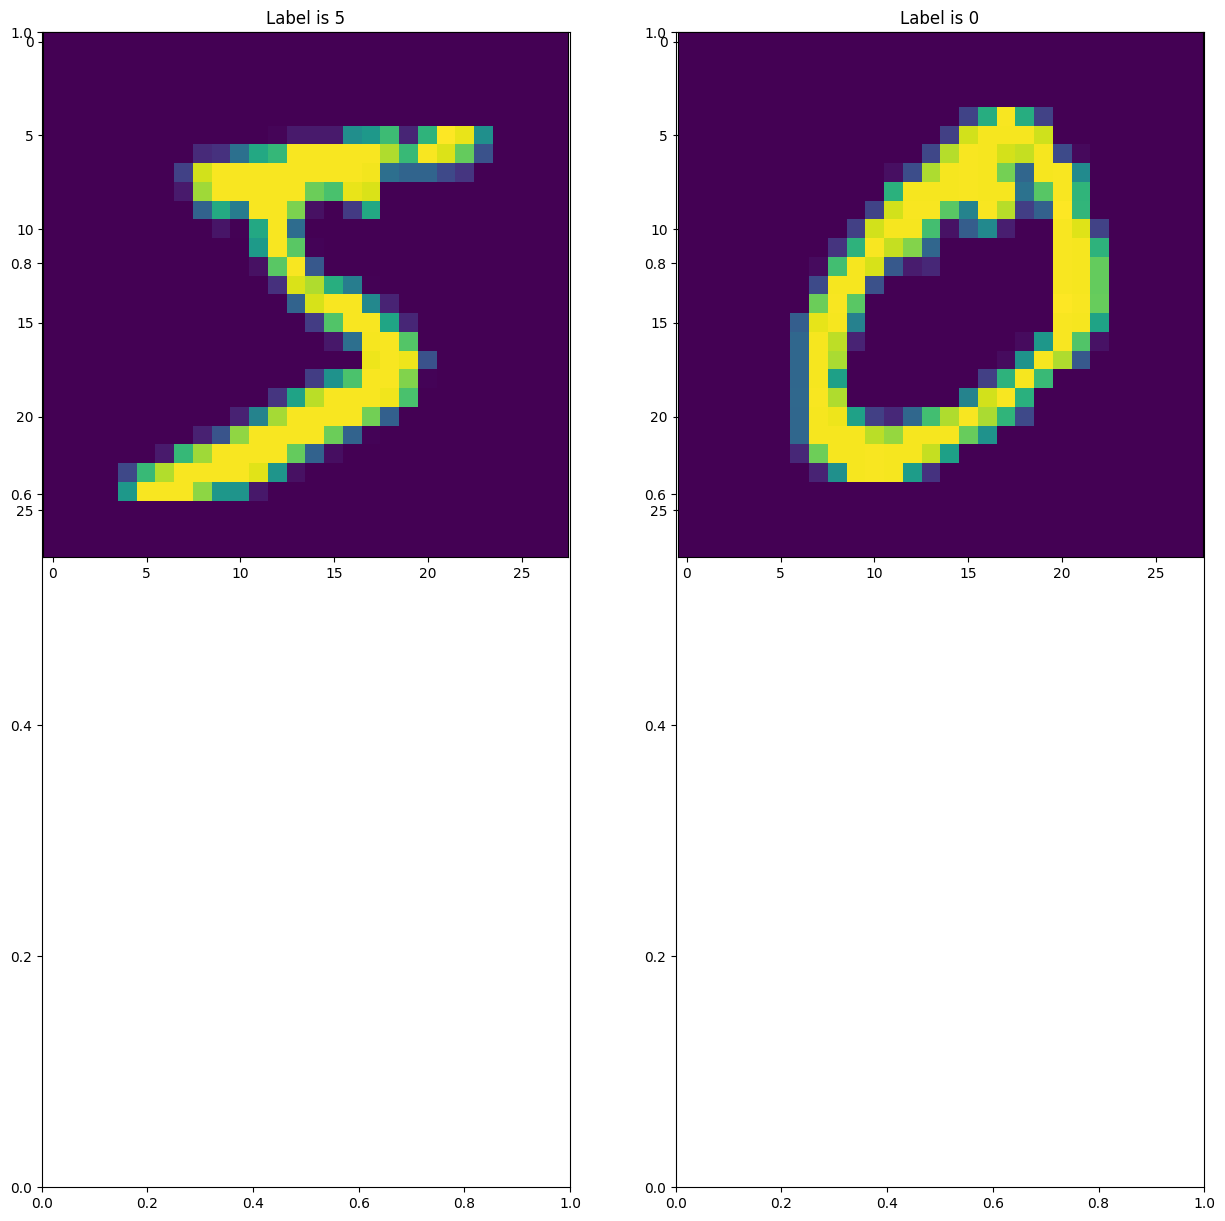

In [7]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [8]:
28*28

784

In [9]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)
Tr_set.shape

(500, 784)

In [10]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1) #L1 Hamming
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

def predict_L2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sqrt(np.sum((Tr_set-X[i,:])**2,axis=1)) #L2 Euclidian
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

def predict_KNN(X, k):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(0,num_test):
        distances=np.sqrt(np.sum((Tr_set-X[i,:])**2,axis=1)) #L2 Euclidian
        
        min_index= np.argsort(distances)[:k]
        Lpred[i] = np.argmax(np.bincount(Ltr_set[min_index]))
    return Lpred

In [11]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)
Labels_predicted_L2=predict_L2(Test_images)
Labels_predicted_KNN=predict_KNN(Test_images, 2)

print("Accuracy         :", np.mean(Labels_predicted==L_test))
# accracy with broken code: 0.2649
print("Accuracy of L2   :", np.mean(Labels_predicted_L2==L_test))
# Accracy with broken code: 0.19
print("Accuracy of KNN  :", np.mean(Labels_predicted_KNN==L_test))


Accuracy         : 0.811
Accuracy of L2   : 0.8294
Accuracy of KNN  : 0.8037


## Task 2.2

In [12]:
def predict_KNN(X_test, Tr_set, Ltr_set, k):
    num_test = X_test.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        
        distances = np.sqrt(np.sum((Tr_set - X_test[i, :]) ** 2, axis=1))
        
        
        min_index = np.argsort(distances)[:k]
        Lpred[i] = np.argmax(np.bincount(Ltr_set[min_index]))
    
    return Lpred


def cross_validate_KNN(X, L, k_values):
    kf = KFold(n_splits=3)
    k_scores = {k: [] for k in k_values}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        L_train, L_test = L[train_index], L[test_index]

        for k in k_values:
            L_pred = predict_KNN(X_test, X_train, L_train, k)
            accuracy = np.mean(L_pred == L_test)
            k_scores[k].append(accuracy)
    
    
    for k in k_scores:
        k_scores[k] = np.mean(k_scores[k])
    
    return k_scores



ks = [1, 3, 5, 7, 9, 11, 13, 15]
performances = cross_validate_KNN(Tr_set, Ltr_set, ks)
for i in ks:
    print("For k = ", i , " accuracy : ", performances[i])


For k =  1  accuracy :  0.831998653295818
For k =  3  accuracy :  0.8240386696486546
For k =  5  accuracy :  0.815994516990116
For k =  7  accuracy :  0.7980063968448645
For k =  9  accuracy :  0.8000384772623428
For k =  11  accuracy :  0.7860303489406727
For k =  13  accuracy :  0.7620301565543611
For k =  15  accuracy :  0.7540701729071976


## Task 3.1

In [41]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y_labels = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ["linear", "poly", "rbf"]
best_f1 = 0
best_f1_kernel = 0
models = {}
for kernel in kernels:
    models[(kernel, "One vs One")] = svm.SVC(kernel=kernel, decision_function_shape="ovo").fit(X_train, y_train)
    models[(kernel, "One vs Rest")] = svm.SVC(kernel=kernel, decision_function_shape="ovr").fit(X_train, y_train)

for (kernel, strategy), model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    current_f1 = f1_score(y_test, y_pred, average='weighted')

    if best_f1 < current_f1:
        best_f1 = current_f1
        best_f1_kernel = kernel
        best_f1_strategy = strategy
        

    print(kernel, " ", strategy, "\nAccuracy: ", accuracy, "\nConfution matrix:\n", cm)
print("Best f1 score:", best_f1, "\nAchived by: ", best_f1_kernel, "\nwith strategy: ", best_f1_strategy)

linear   One vs One 
Accuracy:  1.0 
Confution matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
linear   One vs Rest 
Accuracy:  1.0 
Confution matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
poly   One vs One 
Accuracy:  1.0 
Confution matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
poly   One vs Rest 
Accuracy:  1.0 
Confution matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
rbf   One vs One 
Accuracy:  1.0 
Confution matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
rbf   One vs Rest 
Accuracy:  1.0 
Confution matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Best f1 score: 1.0 
Achived by:  linear 
with strategy:  One vs One


In [45]:
for (kernel, strategy), model in models.items():
    if strategy == "One vs Rest":
        support_vectors = model.support_vectors_
        support_vector_labels = np.sign(model.dual_coef_[0])
        
    for class_id in range(len(kernels)):
        
        class_sv = support_vectors[support_vector_labels == (class_id - 1)]
        
        print("\nClass :",class_id , y_labels[class_id])
        print(class_sv)
            


Class : 0 setosa
[[5.  2.  3.5 1. ]
 [5.  2.3 3.3 1. ]
 [5.1 2.5 3.  1.1]
 [5.7 2.6 3.5 1. ]
 [4.9 2.4 3.3 1. ]
 [7.7 3.8 6.7 2.2]
 [6.  3.  4.8 1.8]
 [4.9 2.5 4.5 1.7]]

Class : 1 versicolor
[[6.7 3.1 4.4 1.4]
 [6.4 3.2 4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.6 3.  4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.6 2.7 4.2 1.3]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.9 3.2 4.8 1.8]
 [6.  2.7 5.1 1.6]
 [6.3 2.5 4.9 1.5]
 [6.1 2.9 4.7 1.4]
 [6.5 2.8 4.6 1.5]
 [7.  3.2 4.7 1.4]
 [5.9 3.  4.2 1.5]
 [6.1 3.  4.6 1.4]
 [6.6 2.9 4.6 1.3]
 [5.5 2.6 4.4 1.2]
 [6.9 3.1 4.9 1.5]
 [6.3 2.3 4.4 1.3]
 [6.3 2.5 5.  1.9]
 [5.8 2.7 5.1 1.9]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.3 2.7 4.9 1.8]
 [5.7 2.5 5.  2. ]
 [5.8 2.7 5.1 1.9]
 [6.4 2.7 5.3 1.9]
 [5.8 2.8 5.1 2.4]
 [6.1 2.6 5.6 1.4]
 [6.  2.2 5.  1.5]
 [6.2 2.8 4.8 1.8]
 [6.4 3.2 5.3 2.3]
 [6.9 3.1 5.4 2.1]
 [6.5 3.  5.2 2. ]
 [7.2 3.  5.8 1.6]
 [6.5 3.  5.5 1.8]
 [5.6 2.8 4.9 2. ]
 [5.9 3.  5.1 1.8]]

Class : 2 virginica
[[5.1 3.8 1.9 0.4]
 [4.8 

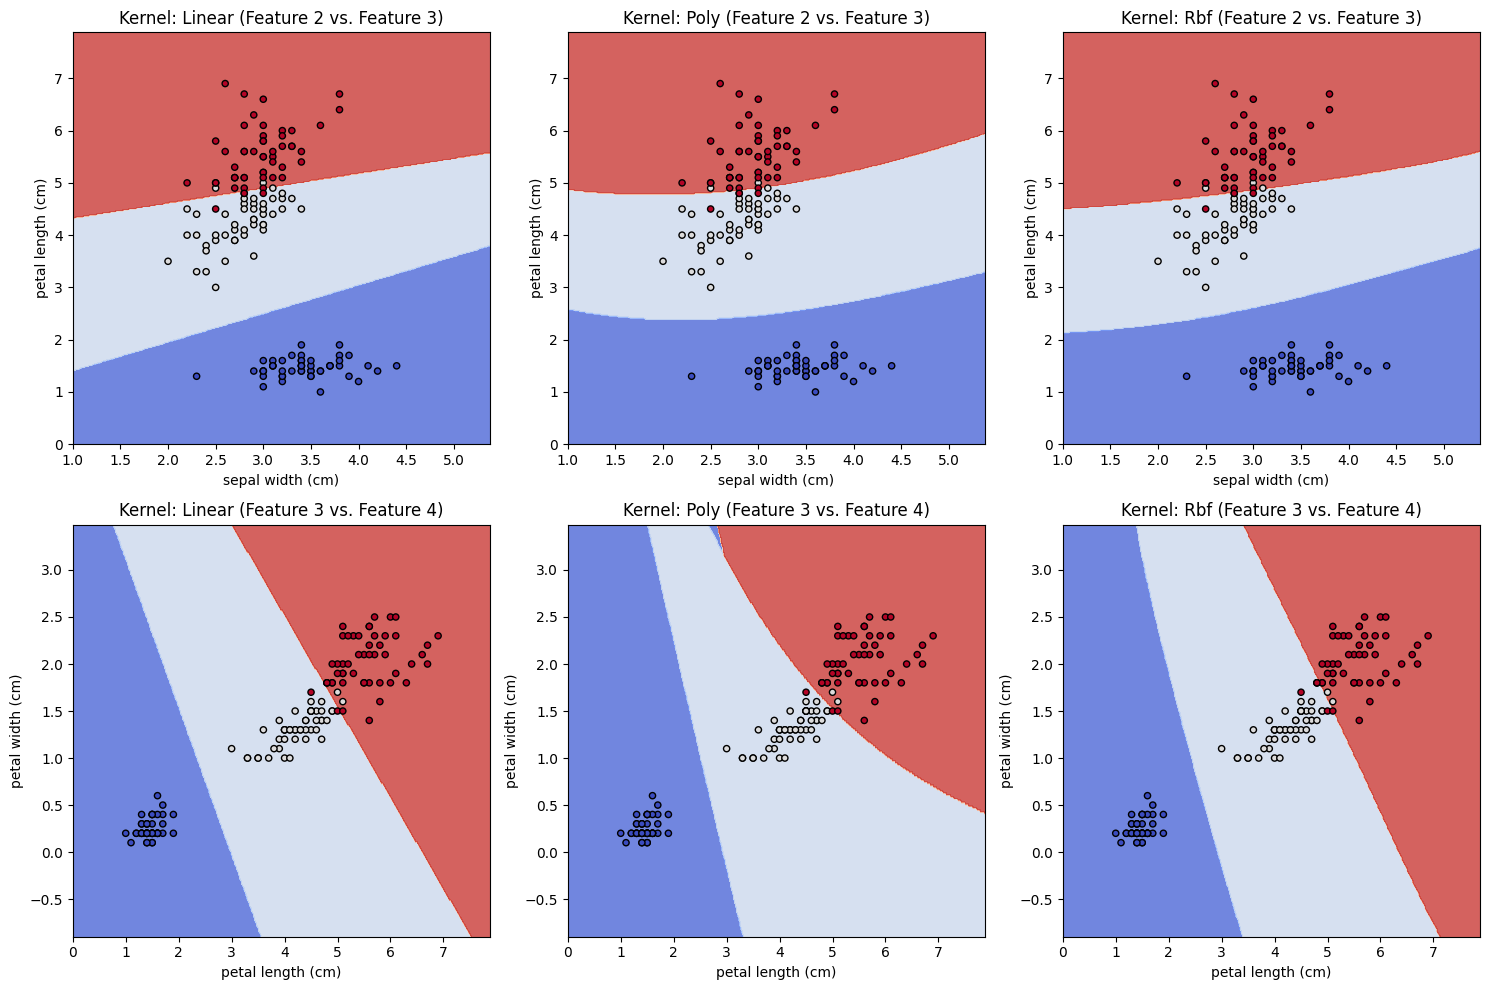

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_boundary(feature_indices, kernel, ax):
    # Selecting the specific features
    X_selected = X[:, feature_indices]

    # The classification SVC model
    model = svm.SVC(kernel=kernel)
    clf = model.fit(X_selected, y)

    # Set-up grid for plotting.
    X0, X1 = X_selected[:, 0], X_selected[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel(f"{feature_names[feature_indices[1]]}")
    ax.set_xlabel(f"{feature_names[feature_indices[0]]}")

# Kernels to use
kernels = ['linear', 'poly', 'rbf']

# Create a figure for subplots
fig, axs = plt.subplots(2, len(kernels), figsize=(15, 10))

# Plot for features 2 vs. 3
for i, kernel in enumerate(kernels):
    plot_decision_boundary([1, 2], kernel, axs[0, i])
    axs[0, i].set_title(f'Kernel: {kernel.capitalize()} (Feature 2 vs. Feature 3)')

# Plot for features 3 vs. 4
for i, kernel in enumerate(kernels):
    plot_decision_boundary([2, 3], kernel, axs[1, i])
    axs[1, i].set_title(f'Kernel: {kernel.capitalize()} (Feature 3 vs. Feature 4)')

plt.tight_layout()
plt.show()
